In [1]:
# importing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))


In [4]:
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)
print("Evaluation of RandomForest with default parameters (n_estimators=10):")
evaluate_model(rf_default, X_test, y_test)


Evaluation of RandomForest with default parameters (n_estimators=10):
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [5]:
param_grid = {'n_estimators': [10, 50, 100, 200, 300]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=4, n_jobs=-1, verbose=1, scoring="accuracy")
grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Results:")
print(score_df[['param_n_estimators', 'mean_test_score']].sort_values(by="mean_test_score", ascending=False))
rf_best = grid_search.best_estimator_
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_
print("\nBest Model found:")
print("n_estimators =", best_n_estimators)
print("Cross-validation Accuracy Score = {:.4f}".format(best_score))
print("\nEvaluation of the best RandomForest model:")
evaluate_model(rf_best, X_test, y_test)


Fitting 4 folds for each of 5 candidates, totalling 20 fits
Grid Search Results:
   param_n_estimators  mean_test_score
0                  10         0.933405
1                  50         0.923789
2                 100         0.923433
3                 200         0.923433
4                 300         0.923433

Best Model found:
n_estimators = 10
Cross-validation Accuracy Score = 0.9334

Evaluation of the best RandomForest model:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



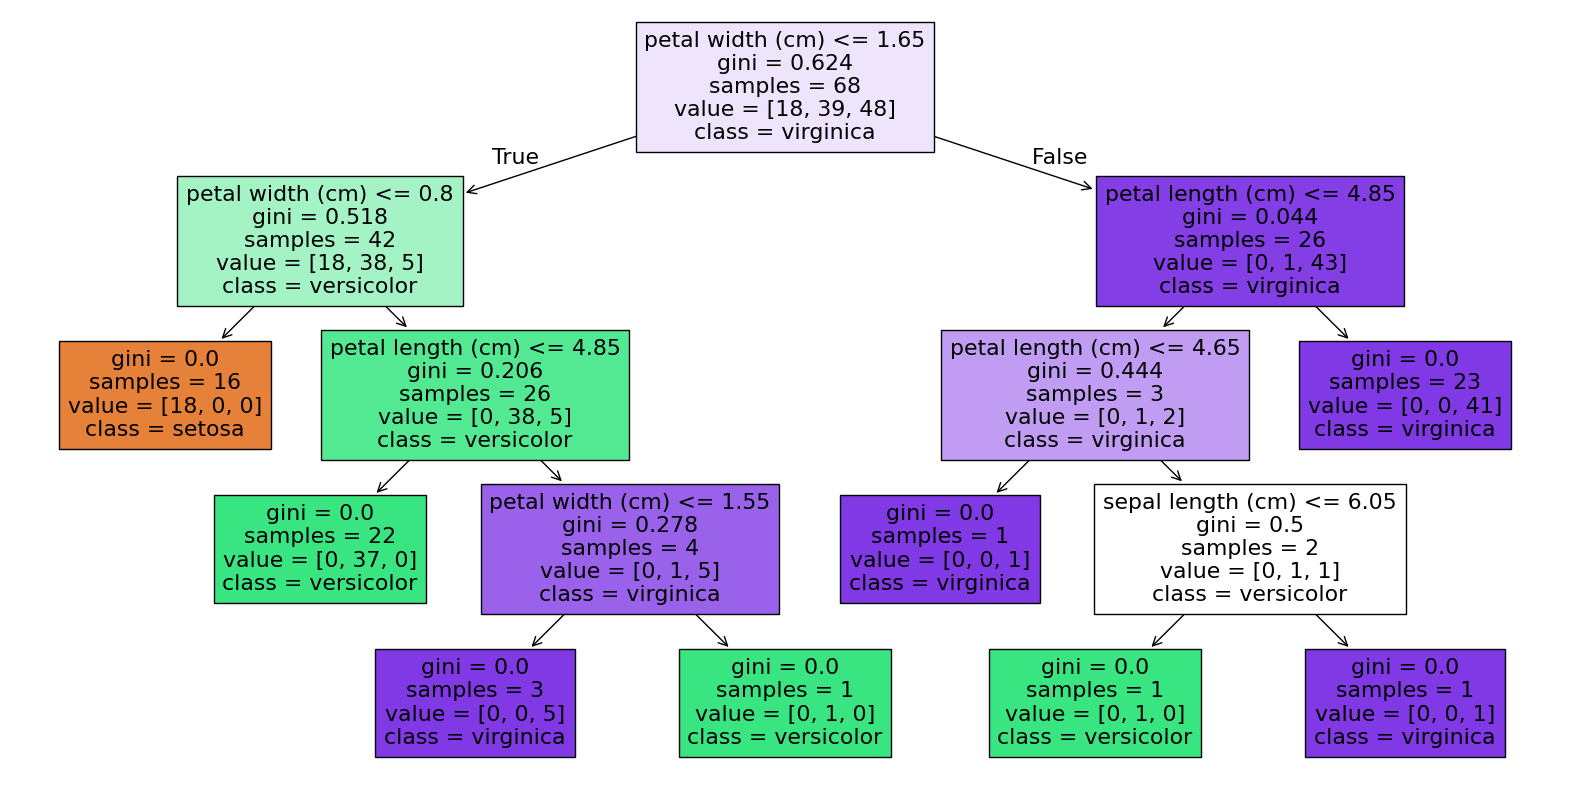

In [6]:
estimator = rf_best.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(estimator, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


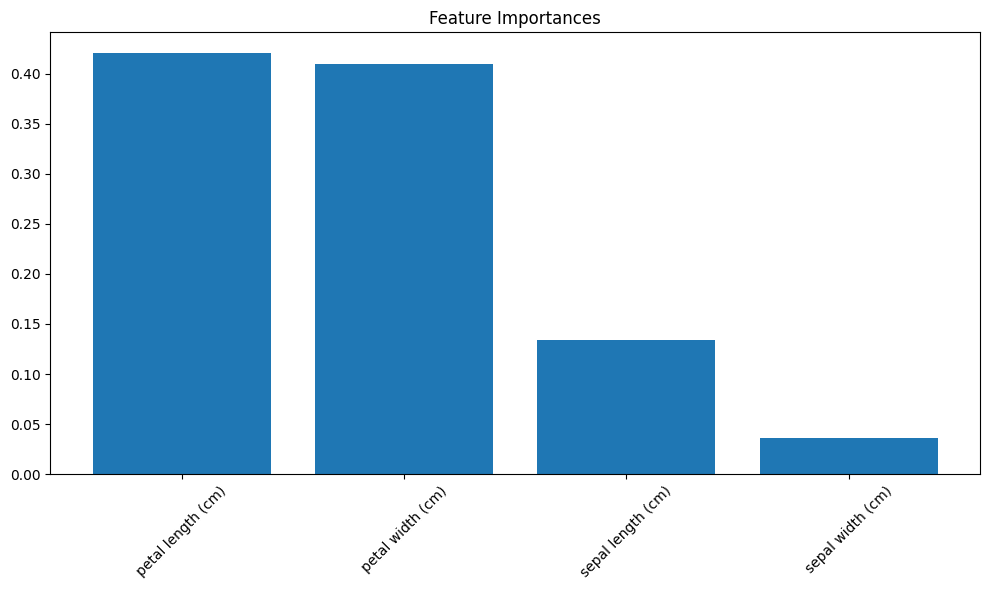

In [7]:
import numpy as np
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(iris.feature_names)[indices], rotation=45)
plt.tight_layout()
plt.show()
